<a href="https://colab.research.google.com/github/shishirsingh645/MACHINE-LEARNING/blob/main/LST_MNDISI_BANGALORE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RELEATIONSHIP BETWEEN LST AND MNDISI 2024

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LANDSLIDE ML/LST_MNSDI.csv')

In [3]:
# Step 1: Check the first few rows and get basic info about the dataset
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   FID        1048575 non-null  int64  
 1   pointid    1048575 non-null  int64  
 2   MNDISI_24  1048575 non-null  float64
 3   MNDISI_14  1048575 non-null  float64
 4   MNDISI_04  1048575 non-null  float64
 5   LST_2024   1048575 non-null  float64
 6   LST_2014   1048575 non-null  float64
 7   LST_2004   1048575 non-null  float64
 8   POINT_X    1048575 non-null  float64
 9   POINT_Y    1048575 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 80.0 MB
None
   FID  pointid  MNDISI_24  MNDISI_14  MNDISI_04   LST_2024   LST_2014  \
0    0  2449300   0.055140   0.062678   0.096334  39.686001  39.209099   
1    1  2449301   0.055140   0.062678   0.096334  39.686001  39.209099   
2    2  2449302   0.056435   0.064555   0.102470  39.556099  38.879299   
3    3  2449303   0.064936   0.

In [5]:
# Step 2: Select relevant columns for regression (MNDISI_24 and LST_2024)
subset_data = data[['MNDISI_24', 'LST_2024']]
# Step 3: Check for missing values
print("Missing values in dataset:")
print(subset_data.isnull().sum())

Missing values in dataset:
MNDISI_24    0
LST_2024     0
dtype: int64


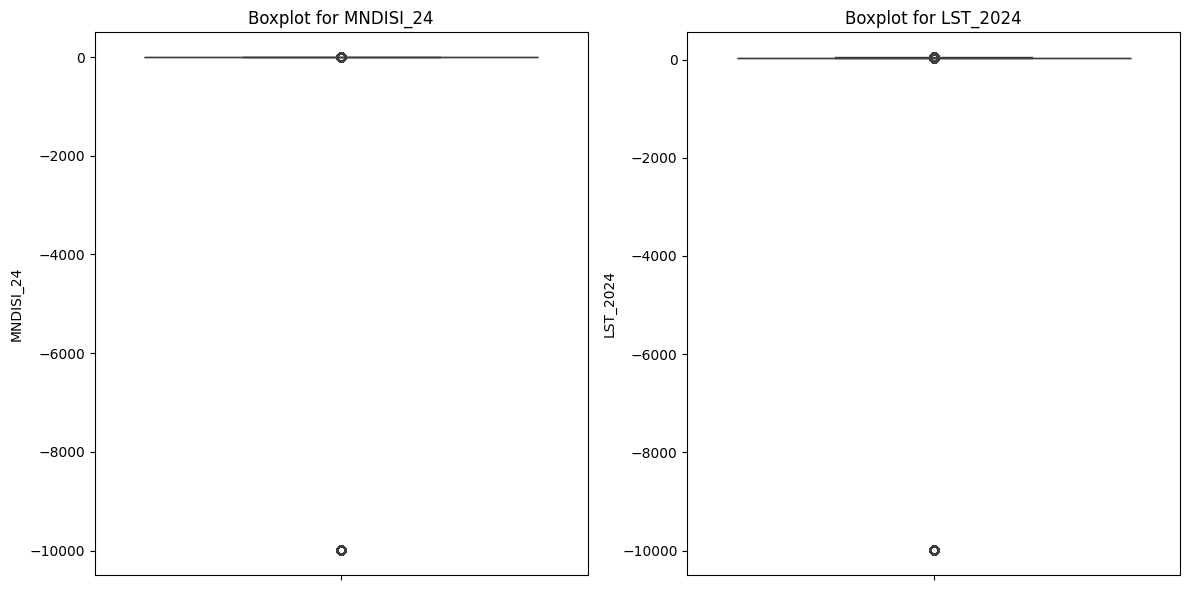

In [8]:
# Step 4: Visualize outliers using boxplots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(subset_data['MNDISI_24'])
plt.title('Boxplot for MNDISI_24')
plt.subplot(1, 2, 2)
sns.boxplot(subset_data['LST_2024'])
plt.title('Boxplot for LST_2024')
plt.tight_layout()
plt.show()

In [9]:
# Step 5: Remove outliers using IQR method for both columns
Q1_mndisi = subset_data['MNDISI_24'].quantile(0.25)
Q3_mndisi = subset_data['MNDISI_24'].quantile(0.75)
IQR_mndisi = Q3_mndisi - Q1_mndisi

Q1_lst = subset_data['LST_2024'].quantile(0.25)
Q3_lst = subset_data['LST_2024'].quantile(0.75)
IQR_lst = Q3_lst - Q1_lst

# Removing outliers
subset_data_clean = subset_data[~((subset_data['MNDISI_24'] < (Q1_mndisi - 1.5 * IQR_mndisi)) |
                                  (subset_data['MNDISI_24'] > (Q3_mndisi + 1.5 * IQR_mndisi)) |
                                  (subset_data['LST_2024'] < (Q1_lst - 1.5 * IQR_lst)) |
                                  (subset_data['LST_2024'] > (Q3_lst + 1.5 * IQR_lst)))]

print(f"Rows removed as outliers: {len(subset_data) - len(subset_data_clean)}")

Rows removed as outliers: 47098


In [10]:
# Step 6: Prepare data for linear regression
X = subset_data_clean[['MNDISI_24']]  # Independent variable
y = subset_data_clean['LST_2024']     # Dependent variable

# Step 7: Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [13]:
# Step 8: Make predictions
y_pred = model.predict(X)
# Step 9: Evaluate the model
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
# Print the results
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")
print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")

Coefficient: 40.89319211252819
Intercept: 37.544616983618575
R-squared: 0.33370371200367255
Mean Squared Error: 4.301877355970433


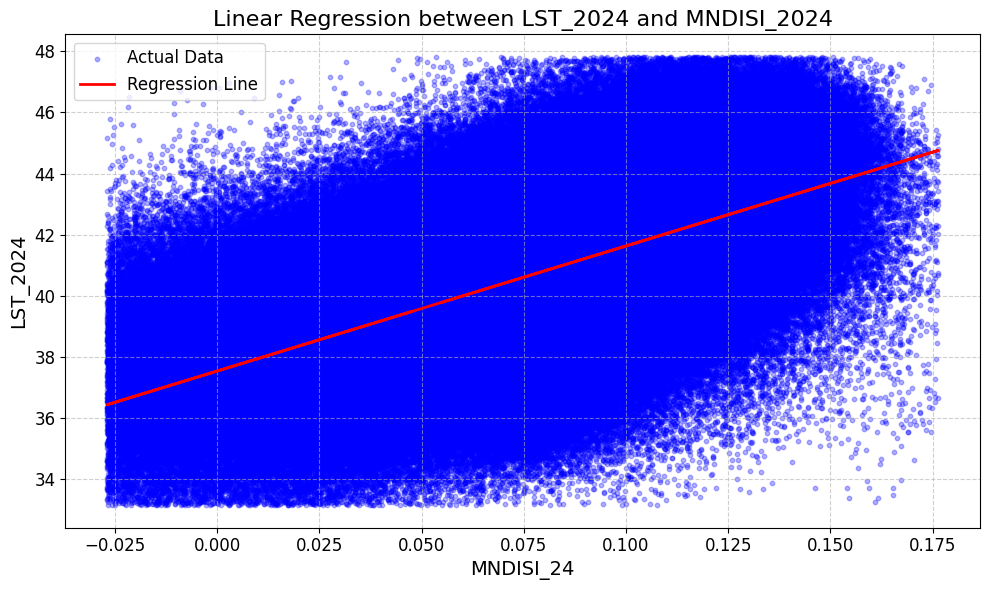

In [24]:
# plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data', s=10, alpha=0.3)
plt.plot(X, y_pred, color='red', label='Regression Line', linewidth=2)
plt.title("Linear Regression between LST_2024 and MNDISI_2024", fontsize=16)
plt.xlabel("MNDISI_24", fontsize=14)
plt.ylabel("LST_2024", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

# RELATIONSHIP BETWEEN LST AND MNDISI 2014

In [26]:
# Select columns for regression (MNDISI_14 and LST_2014)
subset_data_2014 = data[['MNDISI_14', 'LST_2014']]
# Step 1: Check for missing values
print("Missing values in dataset:")
print(subset_data_2014.isnull().sum())

Missing values in dataset:
MNDISI_14    0
LST_2014     0
dtype: int64


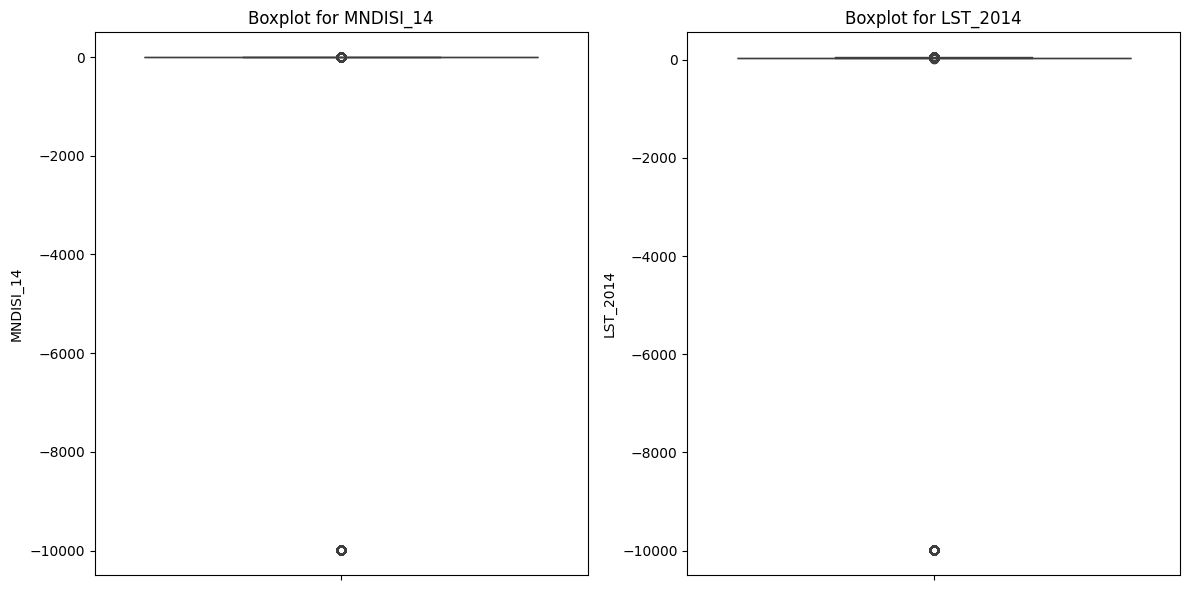

In [27]:
# Step 2: Visualize outliers using boxplots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(subset_data_2014['MNDISI_14'])
plt.title('Boxplot for MNDISI_14')

plt.subplot(1, 2, 2)
sns.boxplot(subset_data_2014['LST_2014'])
plt.title('Boxplot for LST_2014')

plt.tight_layout()
plt.show()

In [28]:
# Step 3: Remove outliers using IQR method for both columns
Q1_mndisi = subset_data_2014['MNDISI_14'].quantile(0.25)
Q3_mndisi = subset_data_2014['MNDISI_14'].quantile(0.75)
IQR_mndisi = Q3_mndisi - Q1_mndisi

Q1_lst = subset_data_2014['LST_2014'].quantile(0.25)
Q3_lst = subset_data_2014['LST_2014'].quantile(0.75)
IQR_lst = Q3_lst - Q1_lst

# Removing outliers
subset_data_clean_2014 = subset_data_2014[~((subset_data_2014['MNDISI_14'] < (Q1_mndisi - 1.5 * IQR_mndisi)) |
                                            (subset_data_2014['MNDISI_14'] > (Q3_mndisi + 1.5 * IQR_mndisi)) |
                                            (subset_data_2014['LST_2014'] < (Q1_lst - 1.5 * IQR_lst)) |
                                            (subset_data_2014['LST_2014'] > (Q3_lst + 1.5 * IQR_lst)))]

print(f"Rows removed as outliers: {len(subset_data_2014) - len(subset_data_clean_2014)}")

Rows removed as outliers: 48567


In [30]:
# Step 4: Prepare data for linear regression
X_2014 = subset_data_clean_2014[['MNDISI_14']]  # Independent variable
y_2014 = subset_data_clean_2014['LST_2014']     # Dependent variable

# Step 5: Create and fit the linear regression model
model_2014 = LinearRegression()
model_2014.fit(X_2014, y_2014)

# Step 6: Make predictions
y_pred_2014 = model_2014.predict(X_2014)

# Step 7: Evaluate the model
r2_2014 = r2_score(y_2014, y_pred_2014)
mse_2014 = mean_squared_error(y_2014, y_pred_2014)
# Print the results
print(f"Coefficient: {model_2014.coef_[0]}")
print(f"Intercept: {model_2014.intercept_}")
print(f"R-squared: {r2_2014}")
print(f"Mean Squared Error: {mse_2014}")

Coefficient: 31.44506780174899
Intercept: 36.5635483292876
R-squared: 0.2776767315706814
Mean Squared Error: 2.476228341738914


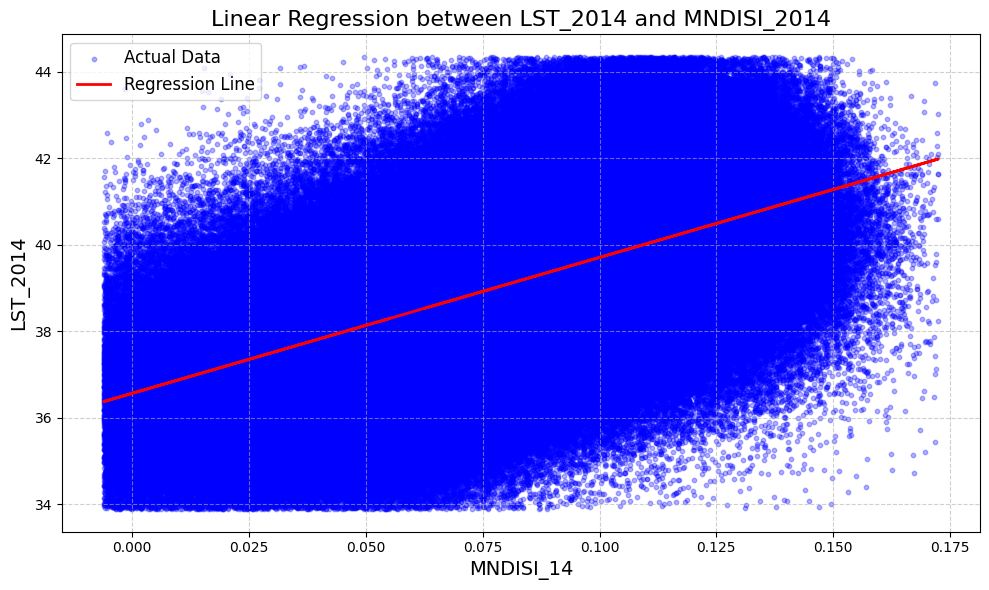

In [33]:
# Step 8: Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_2014, y_2014, color='blue', label='Actual Data', s=10, alpha=0.3)
plt.plot(X_2014, y_pred_2014, color='red', label='Regression Line', linewidth=2)
plt.title("Linear Regression between LST_2014 and MNDISI_2014", fontsize=16)
plt.xlabel("MNDISI_14", fontsize=14)
plt.ylabel("LST_2014", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

# Random forest model 2014 lst MNDSI

In [35]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Prepare data for Random Forest (using the same cleaned data from 2014)
X_2014 = subset_data_clean_2014[['MNDISI_14']]  # Independent variable
y_2014 = subset_data_clean_2014['LST_2014']     # Dependent variable

# Step 2: Create and fit the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_2014, y_2014)

RandomForestRegressor(random_state=42)

In [36]:
# Step 3: Make predictions using the trained model
y_pred_rf = rf_model.predict(X_2014)

In [37]:
# Step 4: Evaluate the Random Forest model
r2_rf = r2_score(y_2014, y_pred_rf)
mse_rf = mean_squared_error(y_2014, y_pred_rf)
# Print the results
print(f"Random Forest R-squared: {r2_rf}")
print(f"Random Forest Mean Squared Error: {mse_rf}")

Random Forest R-squared: 0.5116170981744048
Random Forest Mean Squared Error: 1.6742470248133372


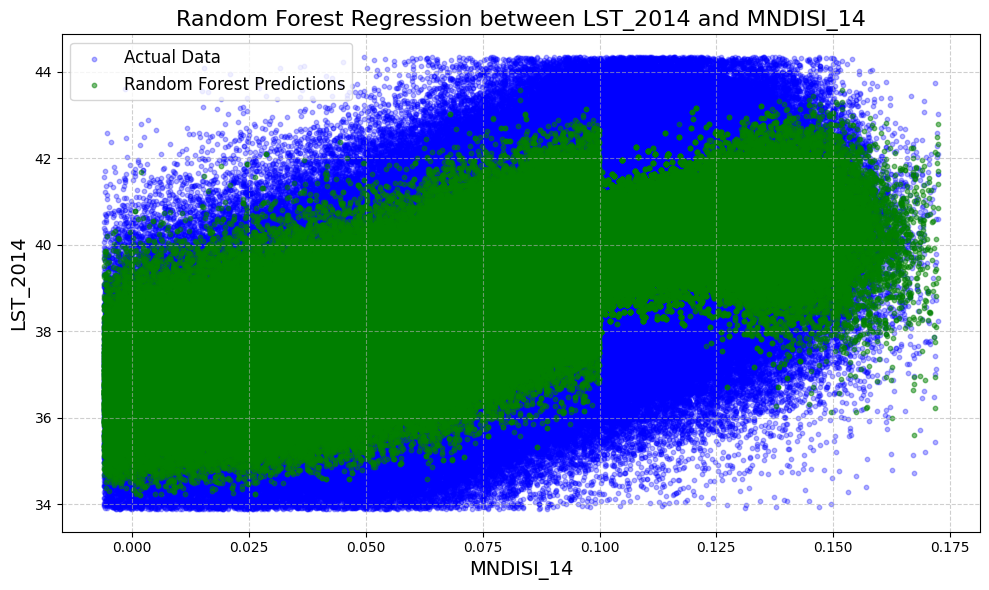

In [38]:
# Step 5: Visualize the actual vs predicted values
plt.figure(figsize=(10, 6))

# Scatter plot for actual data points with smaller points and transparency
plt.scatter(X_2014, y_2014, color='blue', label='Actual Data', s=10, alpha=0.3)

# Regression line with Random Forest predictions
plt.scatter(X_2014, y_pred_rf, color='green', label='Random Forest Predictions', s=10, alpha=0.5)

# Titles and labels with larger font sizes
plt.title("Random Forest Regression between LST_2014 and MNDISI_14", fontsize=16)
plt.xlabel("MNDISI_14", fontsize=14)
plt.ylabel("LST_2014", fontsize=14)

# Adding grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Display legend with better location
plt.legend(loc='upper left', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


# RANDOM FOREST MODEL 2024,2014,2004 LST AND MNDISI

Outliers removed in 2024 MNDISI: 34160, LST: 13723
Outliers removed in 2014 MNDISI: 37574, LST: 13598
Outliers removed in 2004 MNDISI: 38742, LST: 8912
2024 Random Forest:
R-squared: 0.5755809399120455
Mean Squared Error: 2.7245720655245527

2014 Random Forest:
R-squared: 0.5081243128881684
Mean Squared Error: 1.6563356298732643

2004 Random Forest:
R-squared: 0.4013996232372944
Mean Squared Error: 2.13628711896895



<ipython-input-5-b5b822d12607>:105: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


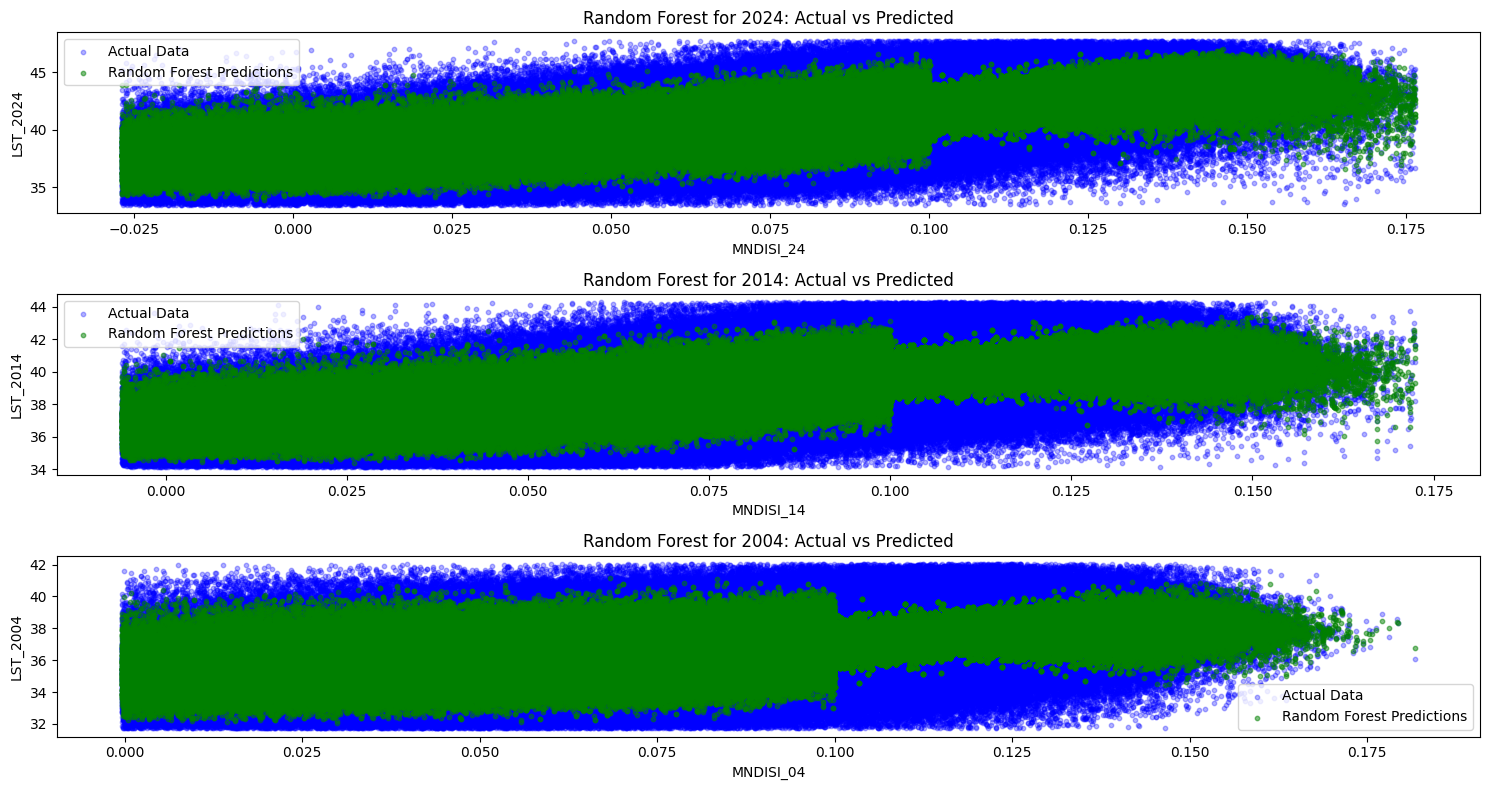

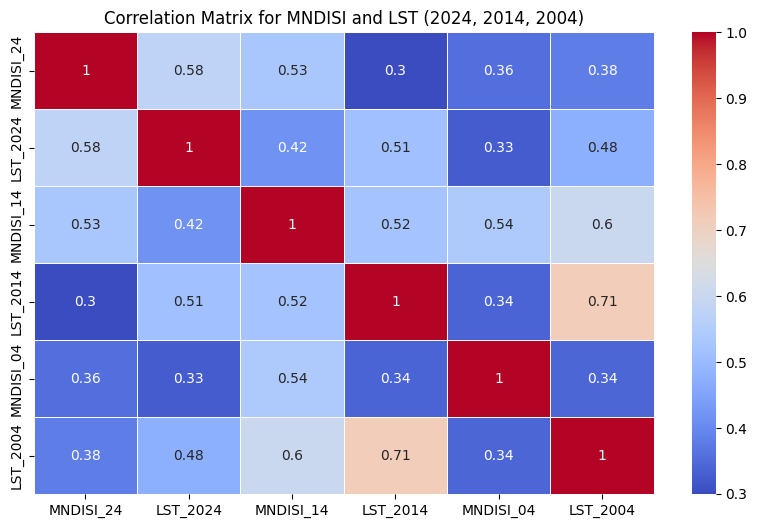

In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Step 1: Define a function to remove outliers using IQR method and return count of outliers
def count_and_remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    before = len(df)
    df_clean = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]
    after = len(df_clean)
    return df_clean, before - after

# Step 2: Prepare the datasets for 2024, 2014, and 2004, and remove outliers
subset_data_2024 = data[['MNDISI_24', 'LST_2024']]
subset_data_clean_2024, outliers_2024 = count_and_remove_outliers(subset_data_2024, 'MNDISI_24')
subset_data_clean_2024, outliers_2024_lst = count_and_remove_outliers(subset_data_clean_2024, 'LST_2024')

subset_data_2014 = data[['MNDISI_14', 'LST_2014']]
subset_data_clean_2014, outliers_2014 = count_and_remove_outliers(subset_data_2014, 'MNDISI_14')
subset_data_clean_2014, outliers_2014_lst = count_and_remove_outliers(subset_data_clean_2014, 'LST_2014')

subset_data_2004 = data[['MNDISI_04', 'LST_2004']]
subset_data_clean_2004, outliers_2004 = count_and_remove_outliers(subset_data_2004, 'MNDISI_04')
subset_data_clean_2004, outliers_2004_lst = count_and_remove_outliers(subset_data_clean_2004, 'LST_2004')

# Step 3: Print the number of outliers removed for each year
print(f"Outliers removed in 2024 MNDISI: {outliers_2024}, LST: {outliers_2024_lst}")
print(f"Outliers removed in 2014 MNDISI: {outliers_2014}, LST: {outliers_2014_lst}")
print(f"Outliers removed in 2004 MNDISI: {outliers_2004}, LST: {outliers_2004_lst}")

# Step 4: Define the Random Forest model function
def random_forest_model(X, y):
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X, y)
    y_pred = rf_model.predict(X)
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    return rf_model, y_pred, r2, mse

# Step 5: Prepare data and run Random Forest for each year

# 2024
X_2024 = subset_data_clean_2024[['MNDISI_24']]
y_2024 = subset_data_clean_2024['LST_2024']
_, y_pred_2024, r2_2024, mse_2024 = random_forest_model(X_2024, y_2024)

# 2014
X_2014 = subset_data_clean_2014[['MNDISI_14']]
y_2014 = subset_data_clean_2014['LST_2014']
_, y_pred_2014, r2_2014, mse_2014 = random_forest_model(X_2014, y_2014)

# 2004
X_2004 = subset_data_clean_2004[['MNDISI_04']]
y_2004 = subset_data_clean_2004['LST_2004']
_, y_pred_2004, r2_2004, mse_2004 = random_forest_model(X_2004, y_2004)

# Step 6: Print results for each year
print("2024 Random Forest:")
print(f"R-squared: {r2_2024}")
print(f"Mean Squared Error: {mse_2024}\n")

print("2014 Random Forest:")
print(f"R-squared: {r2_2014}")
print(f"Mean Squared Error: {mse_2014}\n")

print("2004 Random Forest:")
print(f"R-squared: {r2_2004}")
print(f"Mean Squared Error: {mse_2004}\n")

# Step 7: Visualize Actual vs Predicted for each year
plt.figure(figsize=(15, 8))

# 2024
plt.subplot(3, 1, 1)
plt.scatter(X_2024, y_2024, color='blue', label='Actual Data', s=10, alpha=0.3)
plt.scatter(X_2024, y_pred_2024, color='green', label='Random Forest Predictions', s=10, alpha=0.5)
plt.title("Random Forest for 2024: Actual vs Predicted")
plt.xlabel("MNDISI_24")
plt.ylabel("LST_2024")
plt.legend()

# 2014
plt.subplot(3, 1, 2)
plt.scatter(X_2014, y_2014, color='blue', label='Actual Data', s=10, alpha=0.3)
plt.scatter(X_2014, y_pred_2014, color='green', label='Random Forest Predictions', s=10, alpha=0.5)
plt.title("Random Forest for 2014: Actual vs Predicted")
plt.xlabel("MNDISI_14")
plt.ylabel("LST_2014")
plt.legend()

# 2004
plt.subplot(3, 1, 3)
plt.scatter(X_2004, y_2004, color='blue', label='Actual Data', s=10, alpha=0.3)
plt.scatter(X_2004, y_pred_2004, color='green', label='Random Forest Predictions', s=10, alpha=0.5)
plt.title("Random Forest for 2004: Actual vs Predicted")
plt.xlabel("MNDISI_04")
plt.ylabel("LST_2004")
plt.legend()

plt.tight_layout()
plt.show()

# Step 8: Correlation matrix for all years' MNDISI and LST data
# Combine all columns into one DataFrame
correlation_data = pd.concat([subset_data_clean_2024[['MNDISI_24', 'LST_2024']],
                              subset_data_clean_2014[['MNDISI_14', 'LST_2014']],
                              subset_data_clean_2004[['MNDISI_04', 'LST_2004']]], axis=1)

# Step 9: Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix for MNDISI and LST (2024, 2014, 2004)")
plt.show()


# Time series analysis

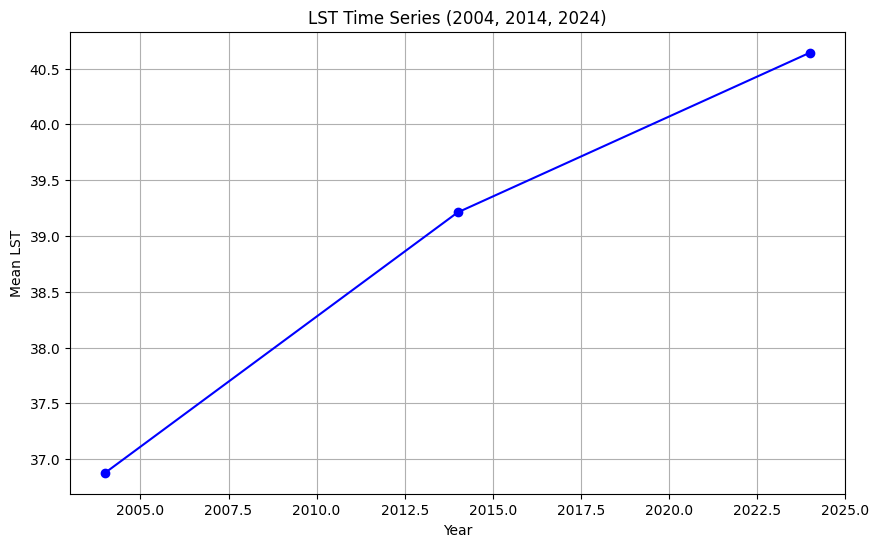

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

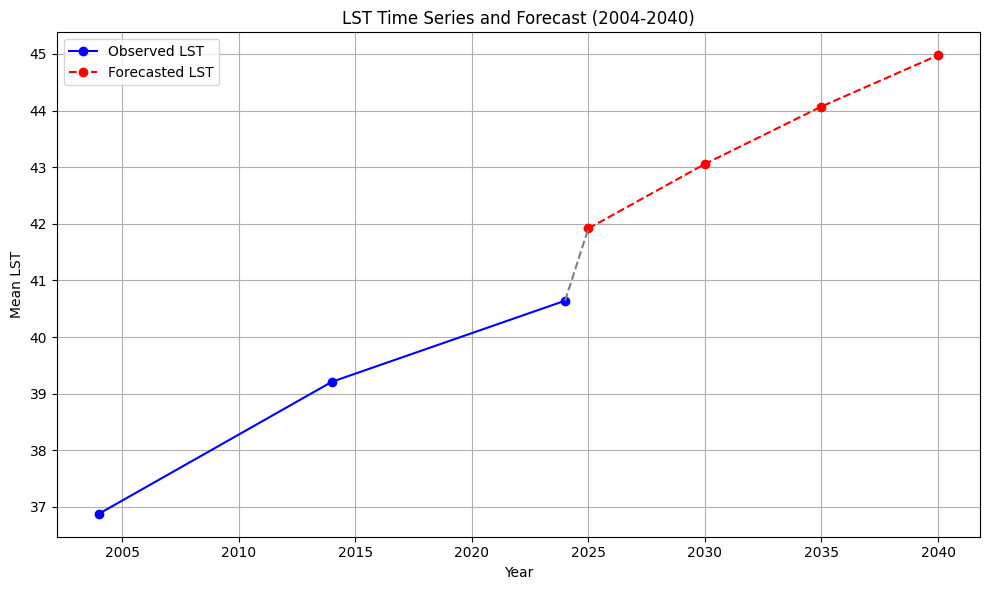

Mean LST for observed years (2004, 2014, 2024): 38.90999039001323
Mean LST for predicted years (2025, 2030, 2035, 2040): 43.50568571931604
Forecasted LST for future years:
            LST
Year           
2025  41.918163
2030  43.056456
2035  44.071496
2040  44.976628


In [9]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Prepare time series data
# Creating a DataFrame with LST data from 2004, 2014, and 2024
lst_data = pd.DataFrame({
    'Year': [2004, 2014, 2024],
    'LST': [subset_data_clean_2004['LST_2004'].mean(),
            subset_data_clean_2014['LST_2014'].mean(),
            subset_data_clean_2024['LST_2024'].mean()]
})

# Set 'Year' as the index to create a time series
lst_data.set_index('Year', inplace=True)

# Step 2: Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(lst_data, marker='o', linestyle='-', color='blue')
plt.title("LST Time Series (2004, 2014, 2024)")
plt.xlabel("Year")
plt.ylabel("Mean LST")
plt.grid(True)
plt.show()

# Step 3: Fit an ARIMA model to predict future values
# Since we have only 3 points, we will use an ARIMA(1, 1, 0) model for simplicity
model = ARIMA(lst_data['LST'], order=(1, 1, 0))
model_fit = model.fit()

# Step 4: Forecast future LST for 2025, 2030, 2035, 2040
forecast_years = [2025, 2030, 2035, 2040]
forecast = model_fit.forecast(steps=4)  # Forecasting for 4 future steps

# Create a DataFrame for forecasted data
forecast_data = pd.DataFrame({
    'Year': forecast_years,
    'LST': forecast
})
forecast_data.set_index('Year', inplace=True)

# Step 5: Plot the actual data and the forecasted data
plt.figure(figsize=(10, 6))

# Plot the actual LST data
plt.plot(lst_data, marker='o', linestyle='-', color='blue', label='Observed LST')

# Plot the forecasted LST data
plt.plot(forecast_data, marker='o', linestyle='--', color='red', label='Forecasted LST')

# Connect the last observed and first forecasted value
plt.plot([2024, 2025], [lst_data['LST'].iloc[-1], forecast_data['LST'].iloc[0]], color='gray', linestyle='--')

# Titles and labels
plt.title("LST Time Series and Forecast (2004-2040)")
plt.xlabel("Year")
plt.ylabel("Mean LST")
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Step 6: Print forecasted values and calculate means
observed_mean = lst_data['LST'].mean()
predicted_mean = forecast_data['LST'].mean()

print(f"Mean LST for observed years (2004, 2014, 2024): {observed_mean}")
print(f"Mean LST for predicted years (2025, 2030, 2035, 2040): {predicted_mean}")

# Display forecasted values
print("Forecasted LST for future years:")
print(forecast_data)
